In [1]:
# pandas - numpy - matplotlib - seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/fake-customer-data-with-errors-1/fake_customer_data_with_errors_1.csv')

# 1- Explore Data


In [3]:
#df.head()
#df.tail()
#df.sample(6)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,15.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,20.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,CUST1447,Mark Mahmoud,66.0,male,mark.mahmoud@hotmail.com,987654321.0,462.47,2023-08-04,Toys,5.0,NaN,male
2146,CUST1381,Fatma Hassan,NaN,M,fatma.hassan@yahoo.com,NaN,237.62,2024-01-28,Toys,5.0,NaN,M
2147,CUST2338,Ali Gaber,-1.0,M,ali.gaber@gmail.com,NaN,174.72,2024-09-29,Books,NaN,NaN,M
2148,CUST1694,John Ali,80.0,Female,john.ali@yahoo.com,987654321.0,250.47,2024-02-05,NaN,5.0,NaN,Female


In [4]:
df.shape

(2150, 12)

In [5]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Email', 'Phone',
       'PurchaseAmount', 'PurchaseDate', 'ProductCategory', 'Rating',
       'Unnamed', '  Gender  '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1632 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [7]:
df.duplicated().sum()

50

In [8]:
df.nunique()

CustomerID         2100
Name                 48
Age                  77
Gender                6
Email               144
Phone                 2
PurchaseAmount     1991
PurchaseDate        860
ProductCategory       5
Rating                6
Unnamed               0
  Gender              6
dtype: int64

In [9]:
#df.isnull().sum()
df.isna().sum()

CustomerID            0
Name                  0
Age                 518
Gender              273
Email                 0
Phone              1078
PurchaseAmount      101
PurchaseDate          0
ProductCategory     577
Rating              329
Unnamed            2150
  Gender            273
dtype: int64

In [10]:
df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1632.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,43.973039,5.668417e+08,509.008926,4.183416,NaN
std,36.254388,4.321530e+08,288.781560,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,53.000000,9.876543e+08,519.250000,3.000000,NaN
75%,80.000000,9.876543e+08,762.910000,5.000000,NaN
max,90.000000,9.876543e+08,999.560000,10.000000,NaN


# 2- Clean Data


In [11]:
df=df.drop(columns=['Unnamed','  Gender  '])

In [12]:
df.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,15.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0


In [13]:
df['Add']=1

In [14]:
#df.sample(6)
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,1
2,CUST1002,Ahmed Mahmoud,15.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,1
3,CUST1003,Ahmed Gaber,20.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,1
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1
5,CUST1005,Alaa Ibrahim,NaN,F,alaa.ibrahim@hotmail.com,987654321.0,886.26,2025-01-16,NaN,2.0,1
6,CUST1006,Mark Ali,-1.0,male,mark.ali@hotmail.com,NaN,92.53,2024-06-12,Books,2.0,1
7,CUST1007,Alaa Hassan,50.0,female,alaa.hassan@hotmail.com,987654321.0,318.43,2024-05-17,Toys,10.0,1
8,CUST1008,John Hassan,89.0,Male,john.hassan@yahoo.com,NaN,883.52,32/13/2020,Home,4.0,1
9,CUST1009,Fatma Gaber,60.0,Female,fatma.gaber@hotmail.com,NaN,966.47,2025-01-24,Electronics,2.0,1


In [15]:
#df.drop_duplicates(inplace=True)
df=df.drop_duplicates()

In [16]:
df.shape

(2100, 11)

In [17]:
#df['Gender'].unique()

In [18]:
df['Gender']=df['Gender'].str.lower()

In [19]:
df['Gender']=df['Gender'].replace({'m':'male','f':'female','Male':'male'})

In [20]:
df['Gender']=df['Gender'].fillna('male')

In [21]:
df['Age']=df['Age'].fillna(df['Age'].mean())
print(df['Age'])

0       72.000000
1       43.884712
2       15.000000
3       20.000000
4       73.000000
          ...    
2095    36.000000
2096    80.000000
2097    43.884712
2098    80.000000
2099    80.000000
Name: Age, Length: 2100, dtype: float64


In [22]:
df['ProductCategory']=df['ProductCategory'].fillna('Unknown')

In [23]:
df['Phone'] = df['Phone'].fillna('No Phone')

In [24]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1
1,CUST1001,Fatma Ali,43.884712,female,fatma.ali@hotmail.com,No Phone,900.25,2023-02-23,Unknown,3.0,1
2,CUST1002,Ahmed Mahmoud,15.000000,male,ahmed.mahmoud@hotmail.com,No Phone,761.72,2023-07-07,Toys,2.0,1
3,CUST1003,Ahmed Gaber,20.000000,female,ahmed.gaber@gmail.com,No Phone,303.72,2023-12-30,Unknown,2.0,1
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2095,CUST3095,Alaa Ali,36.000000,male,alaa.ali@hotmail.com,987654321.0,708.91,2025-06-06,Unknown,4.0,1
2096,CUST3096,Lina Gaber,80.000000,female,lina.gaber@yahoo.com,No Phone,70.47,2023-08-06,Toys,4.0,1
2097,CUST3097,Ali Ibrahim,43.884712,female,ali.ibrahim@hotmail.com,987654321.0,804.19,2023-11-02,Clothing,4.0,1
2098,CUST3098,Mark Mahmoud,80.000000,female,mark.mahmoud@hotmail.com,123456789.0,328.31,2023-03-24,Unknown,1.0,1


In [25]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')

In [26]:
df['Age']=df['Age'].apply(lambda x:df['Age'].mean() if x<0 else x)

In [27]:
df=df.dropna()

In [28]:
df

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1
1,CUST1001,Fatma Ali,43.884712,female,fatma.ali@hotmail.com,No Phone,900.25,2023-02-23,Unknown,3.0,1
2,CUST1002,Ahmed Mahmoud,15.000000,male,ahmed.mahmoud@hotmail.com,No Phone,761.72,2023-07-07,Toys,2.0,1
3,CUST1003,Ahmed Gaber,20.000000,female,ahmed.gaber@gmail.com,No Phone,303.72,2023-12-30,Unknown,2.0,1
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2094,CUST3094,Mark Smith,28.000000,male,mark.smith@hotmail.com,No Phone,73.56,2025-06-12,Electronics,2.0,1
2095,CUST3095,Alaa Ali,36.000000,male,alaa.ali@hotmail.com,987654321.0,708.91,2025-06-06,Unknown,4.0,1
2096,CUST3096,Lina Gaber,80.000000,female,lina.gaber@yahoo.com,No Phone,70.47,2023-08-06,Toys,4.0,1
2097,CUST3097,Ali Ibrahim,43.884712,female,ali.ibrahim@hotmail.com,987654321.0,804.19,2023-11-02,Clothing,4.0,1


In [29]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
new_data = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
new_data.head()


36.11528822055138
-10.288220551378444


,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add


In [30]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df.head(5)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1
1,CUST1001,Fatma Ali,43.884712,female,fatma.ali@hotmail.com,No Phone,900.25,2023-02-23,Unknown,3.0,1
2,CUST1002,Ahmed Mahmoud,15.000000,male,ahmed.mahmoud@hotmail.com,No Phone,761.72,2023-07-07,Toys,2.0,1
3,CUST1003,Ahmed Gaber,20.000000,female,ahmed.gaber@gmail.com,No Phone,303.72,2023-12-30,Unknown,2.0,1
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1


# 3- Data Analysis


In [31]:
df.sort_values(by=['PurchaseAmount','Rating'],ascending=False).head(10)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add
687,CUST1687,Alaa Ibrahim,80.000000,female,alaa.ibrahim@yahoo.com,123456789.0,999.56,2025-05-16,Electronics,1.0,1
1949,CUST2949,Fatma Mahmoud,63.000000,female,fatma.mahmoud@yahoo.com,No Phone,999.30,2024-04-10,Clothing,3.0,1
424,CUST1424,John Ali,80.000000,male,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0,1
1832,CUST2832,John Ali,49.000000,male,john.ali@yahoo.com,No Phone,999.00,2024-10-10,Toys,1.0,1
1961,CUST2961,Mark Mahmoud,43.884712,male,mark.mahmoud@yahoo.com,No Phone,998.59,2025-04-25,Electronics,2.0,1
631,CUST1631,Lina Mahmoud,18.000000,female,lina.mahmoud@gmail.com,No Phone,998.16,2023-10-09,Books,5.0,1
386,CUST1386,Fatma Ali,80.000000,female,fatma.ali@hotmail.com,123456789.0,995.55,2022-11-12,Clothing,4.0,1
335,CUST1335,Alaa Mahmoud,43.884712,female,alaa.mahmoud@yahoo.com,123456789.0,995.41,2024-02-11,Toys,3.0,1
908,CUST1908,Sara Ali,43.884712,female,sara.ali@yahoo.com,No Phone,995.32,2023-09-04,Clothing,1.0,1
418,CUST1418,Ali Ali,43.884712,male,ali.ali@hotmail.com,No Phone,994.98,2025-07-04,Toys,3.0,1


In [32]:
df['ProductCategory'].value_counts()

ProductCategory
Unknown        447
Clothing       252
Electronics    247
Books          236
Home           215
Toys           211
Name: count, dtype: int64

In [33]:
df['Rating'].value_counts().sort_index()

Rating
1.0     250
2.0     272
3.0     299
4.0     247
5.0     276
10.0    264
Name: count, dtype: int64

In [34]:
gender_counts=df['Gender'].value_counts()
gender_counts

Gender
male      920
female    688
Name: count, dtype: int64

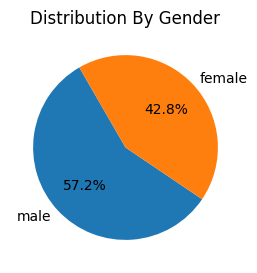

In [35]:
plt.figure(figsize=(3,3))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=120)
plt.title('Distribution By Gender')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


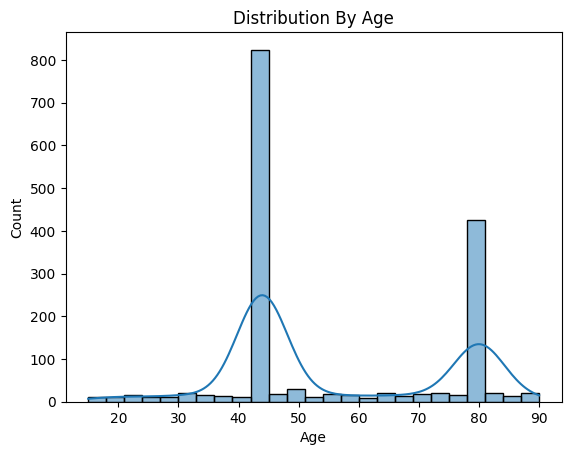

In [36]:
sns.histplot(df['Age'],bins=25,kde=True)
plt.title('Distribution By Age')
plt.show()

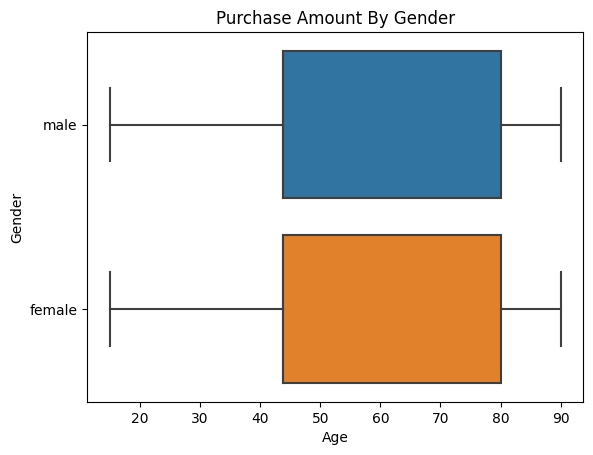

In [37]:
sns.boxplot(data=df,x='Age',y='Gender')
plt.title('Purchase Amount By Gender')
plt.show()

In [38]:
corr=df[['Age','Rating','PurchaseAmount']].corr()

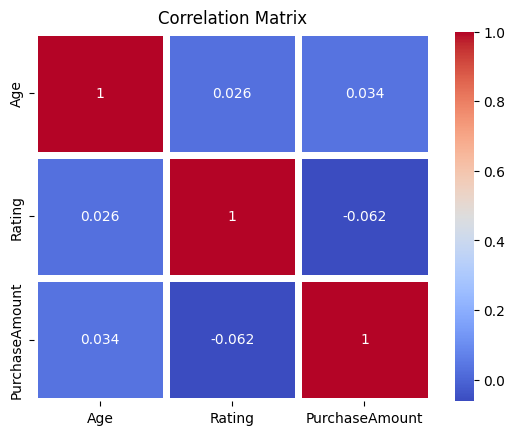

In [39]:
sns.heatmap(corr,annot=True,linewidths=5,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

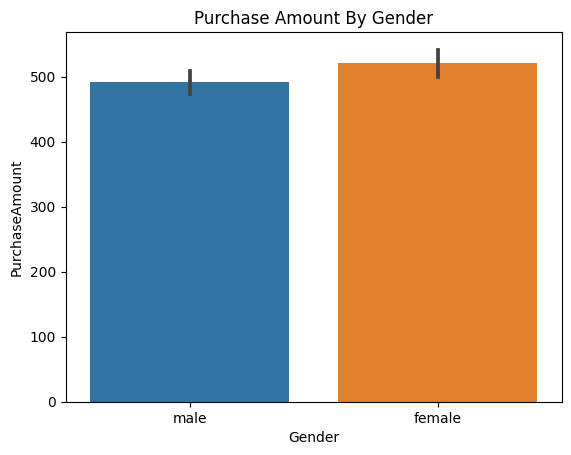

In [40]:
sns.barplot(data=df,x='Gender',y='PurchaseAmount',estimator='mean')
plt.title('Purchase Amount By Gender')
plt.show()

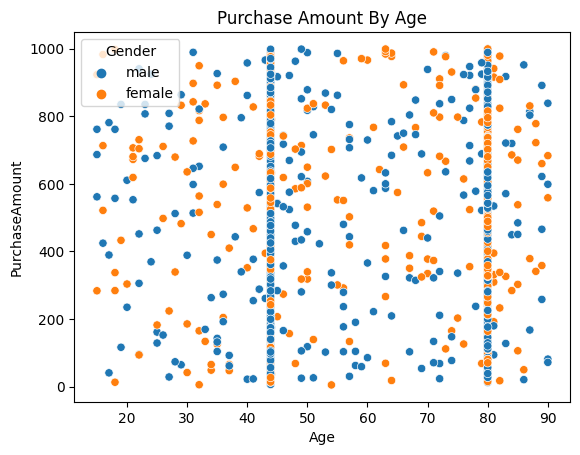

In [41]:
sns.scatterplot(data=df,x='Age',y='PurchaseAmount',hue='Gender')
plt.title('Purchase Amount By Age')
plt.show()

In [42]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce', dayfirst=True)


In [43]:
df['PurchaseDate']

0      2023-10-12
1      2023-02-23
2      2023-07-07
3      2023-12-30
4      2023-12-07
          ...    
2094   2025-06-12
2095   2025-06-06
2096   2023-08-06
2097   2023-11-02
2098   2023-03-24
Name: PurchaseDate, Length: 1608, dtype: datetime64[ns]

In [44]:
df['Month']=df['PurchaseDate'].dt.month

In [45]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Add,Month
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,1,10
1,CUST1001,Fatma Ali,43.884712,female,fatma.ali@hotmail.com,No Phone,900.25,2023-02-23,Unknown,3.0,1,2
2,CUST1002,Ahmed Mahmoud,15.000000,male,ahmed.mahmoud@hotmail.com,No Phone,761.72,2023-07-07,Toys,2.0,1,7
3,CUST1003,Ahmed Gaber,20.000000,female,ahmed.gaber@gmail.com,No Phone,303.72,2023-12-30,Unknown,2.0,1,12
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,1,12


In [46]:
monthly_sales=df.groupby('Month')['PurchaseAmount'].sum()

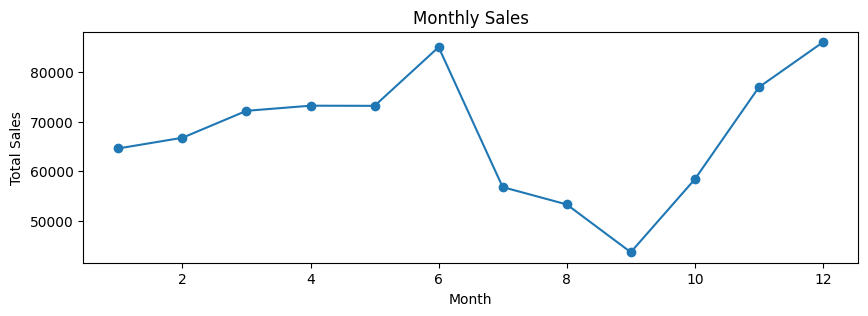

In [47]:
monthly_sales.plot(figsize=(10,3),kind='line',marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [48]:
df.to_csv('Clean_Data_2025',index=False)